###REGRESION LINEAL
Algoritmo supervisado.

Es una aproximación para modelar la relación entre una variable escalar dependiente "y" y una o más variables explicativas "x". La idea es dibujar una recta que indicará la tendencia del conjunto de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Paso 1 OBTENCIÓN DE DATOS

In [4]:
path="/content/drive/MyDrive/Colab Notebooks/Bimestre 3/USA_Housing.csv"

In [5]:
casas = pd.read_csv(path)
casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Paso 2 LIMPIEZA DE DATOS.
En este caso lo dejamos tal cual estaban.

In [6]:
casas.head()
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


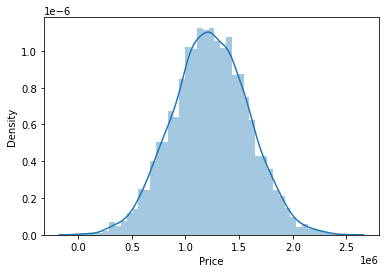

In [10]:
sns.distplot(casas['Price'])

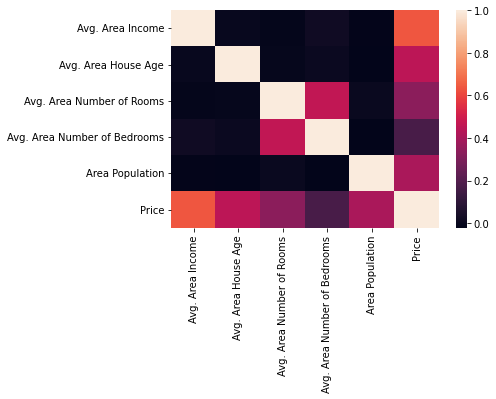

In [11]:
sns.heatmap(casas.corr()) #,annot = True)

Paso 3 SEPARACIÓN DATOS DE ENTRENAMIENTO Y DE PRUEBA

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

Miro las columnas para ver cuales son las variables numericas y la variable objetivo, que en este caso es el precio ('Price')


In [14]:
x = casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

En x me quedo con las columnas deseadas


In [15]:
y = casas[['Price']]

En y me quedo con la variable objetivo

Separamos los datos de entrenamiento y test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Paso 4 ENTRENAMIENTO DEL MODELO

In [17]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

Paso 5 EVALUACION DEL MODELO

In [18]:
from sklearn import metrics

In [19]:
predicciones = modelo.predict(x_test)
predicciones

array([[1308536.13592598],
       [1237122.72746456],
       [1243835.62817087],
       ...,
       [1457119.79297219],
       [1483428.95309288],
       [1047510.59737212]])

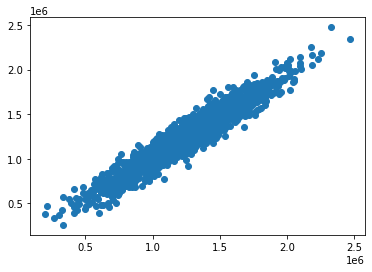

In [20]:
plt.scatter(y_test, predicciones)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


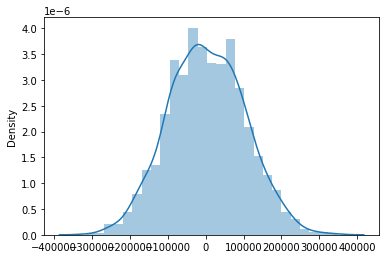

In [21]:
sns.distplot(y_test - predicciones)

En los dos graficos vemos que tenemos una recta y una distribución normal, por lo que el modelo es buena y puede pasar a ser el modelo definitivo.

De forma numerica tenemos 3 tipos: el MAE (mean absolute error) - media del valor absoluto de los errores.

In [22]:
metrics.mean_absolute_error(y_test, predicciones)

81135.56609336872

el MSE (mean square error) - media de los errores al cuadrado

In [23]:
metrics.mean_squared_error(y_test, predicciones)

10068422551.400831

el RMSE - raiz cuadrada de la media de los errores al cuadrado

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, predicciones))

100341.52954485411

Cuanto mas pequeños sean las metricas del modelo, más correcto es el modelo.